# Survival Analytics

#### Perform survival analysis on patients ecg data after operation. The survival time in hours after the operation is given and the event type is denoted by 1(if dead) and 0(if alive).

In [1]:
#import libraries
import pandas as pd
from lifelines import KaplanMeierFitter

In [2]:
#import dataset
ecg_df = pd.read_excel(r"D:\360digi\DS\Sharath\Survival_Analytics\handson\Datasets_Survival Analytics\ECG_Surv.xlsx")
ecg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   survival_time_hr      133 non-null    float64
 1   alive                 133 non-null    int64  
 2   age                   133 non-null    int64  
 3   pericardialeffusion   133 non-null    int64  
 4   fractionalshortening  133 non-null    float64
 5   epss                  117 non-null    float64
 6   lvdd                  121 non-null    float64
 7   wallmotion-score      128 non-null    float64
 8   wallmotion-index      130 non-null    float64
 9   multi_sensor          129 non-null    float64
 10  name                  131 non-null    object 
 11  group                 133 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 12.6+ KB


In [3]:
ecg_df.head()

,survival_time_hr,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,multi_sensor,name,group
0,11.0,0,71,0,0.260,9.000,4.600,14.0,1.00,1.000,name,1
1,19.0,0,72,0,0.380,6.000,4.100,14.0,1.70,0.588,name,1
2,16.0,0,55,0,0.260,4.000,3.420,14.0,1.00,1.000,name,1
3,57.0,0,60,0,0.253,12.062,4.603,16.0,1.45,0.788,name,1
4,19.0,1,57,0,0.160,22.000,5.750,18.0,2.25,0.571,name,1


In [4]:
ecg_df.group.value_counts()

2    87
1    24
3    22
Name: group, dtype: int64

In [5]:
ecg_df.describe()

,survival_time_hr,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,multi_sensor,group
count,133.000000,133.000000,133.000000,133.000000,133.000000,117.000000,121.000000,128.000000,130.00000,129.000000,133.000000
mean,21.795338,0.383459,62.413534,0.187970,0.228534,12.164769,4.763157,14.438125,1.37800,0.786202,1.984962
std,15.885313,0.488067,9.335601,0.392165,0.135864,7.370159,0.810013,5.018566,0.45185,0.225661,0.590133
min,0.030000,0.000000,23.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.00000,0.140000,1.000000
25%,6.000000,0.000000,57.000000,0.000000,0.150000,7.000000,4.230000,11.000000,1.00000,0.714000,2.000000
50%,22.000000,0.000000,62.000000,0.000000,0.217000,11.000000,4.650000,14.000000,1.21600,0.786000,2.000000
75%,33.000000,1.000000,68.000000,0.000000,0.280000,16.100000,5.300000,16.500000,1.50750,0.857000,2.000000
max,57.000000,1.000000,86.000000,1.000000,0.840000,40.000000,6.780000,39.000000,3.00000,2.000000,3.000000


In [6]:
# survival_time_hr is referring to time 
T = ecg_df.survival_time_hr
T

0      11.0
1      19.0
2      16.0
3      57.0
4      19.0
       ... 
128     7.5
129    41.0
130    36.0
131    22.0
132    20.0
Name: survival_time_hr, Length: 133, dtype: float64

In [7]:
# Initiating the KaplanMeierFitter model
kmf = KaplanMeierFitter()
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

In [8]:
# Fitting KaplanMeierFitter model on survival time and Alive event for patients 
kmf.fit(T, event_observed = ecg_df.alive)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 133 total observations, 82 right-censored observations>

<AxesSubplot:xlabel='timeline'>

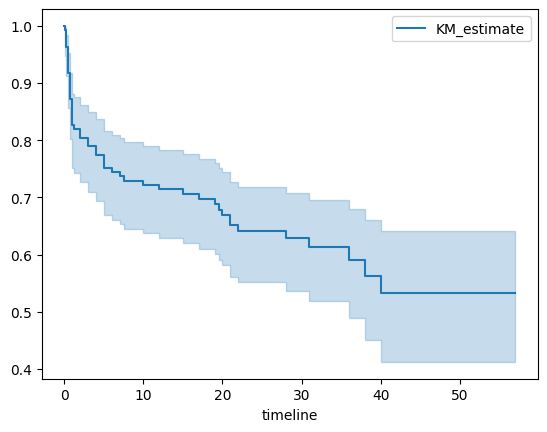

In [9]:
# Time-line estimations plot 
kmf.plot()

In [10]:
# Over Multiple groups 
ecg_df.group.value_counts()

2    87
1    24
3    22
Name: group, dtype: int64

In [11]:
import matplotlib.pyplot  as plt
plt.figure(1)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

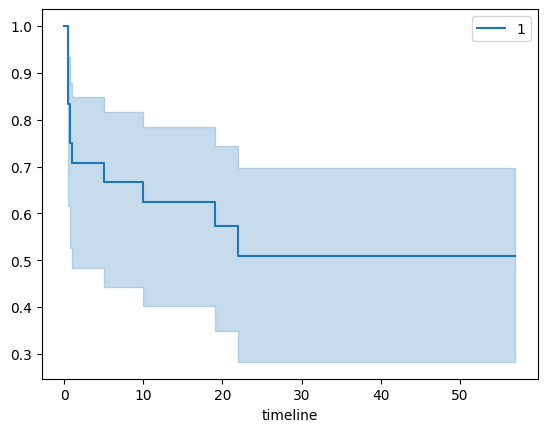

In [12]:
# Applying KaplanMeierFitter model on Time and Events for the group "1"
m1 = kmf1.fit(T[ecg_df.group==1], ecg_df.alive[ecg_df.group==1], label='1')
ax1 = kmf1.plot()  # group 1 patients within few hrs after the operation they are dying. And after 20hrs the death rate nearly low/constant.

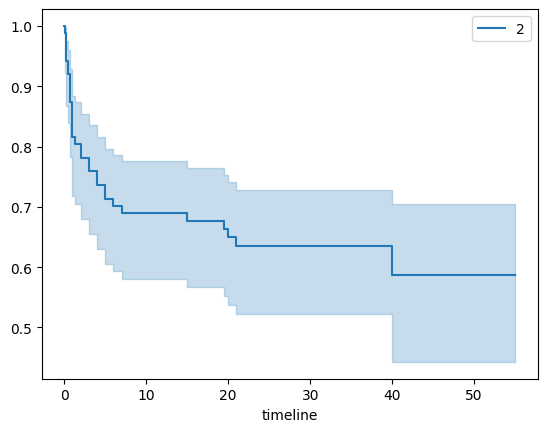

In [13]:
# Applying KaplanMeierFitter model on Time and Events for the group "2"
m2 = kmf2.fit(T[ecg_df.group==2], ecg_df.alive[ecg_df.group==2], label='2')
ax2 = m2.plot()  # group 2 patients within few hrs after the operation they are dying.

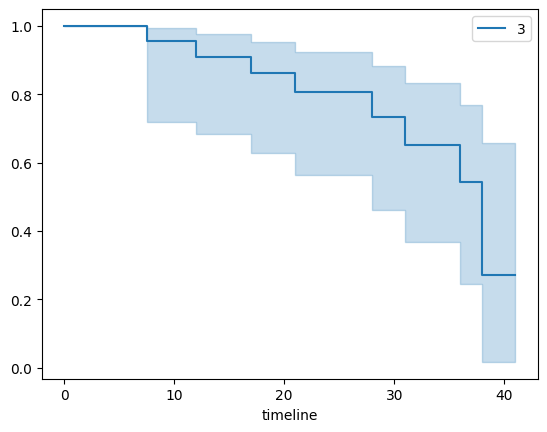

In [14]:
# Applying KaplanMeierFitter model on Time and Events for the group "3" 
m3=kmf3.fit(T[ecg_df.group==3], ecg_df.alive[ecg_df.group==3], label='3')
ax3 = m3.plot() # group 3 patients are alive after the operation as the survival hours increases.

<AxesSubplot:xlabel='timeline'>

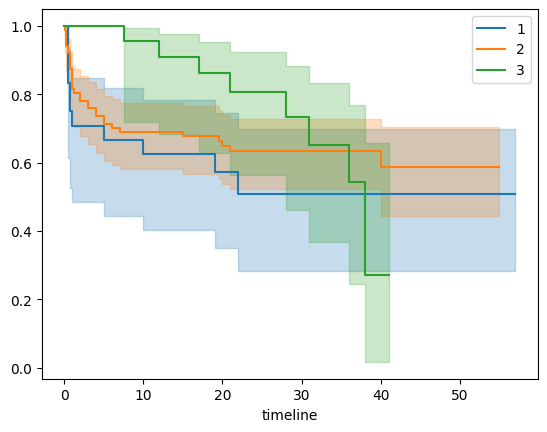

In [15]:
kmf1.plot();kmf2.plot();kmf3.plot()